# importing libraries

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Loading Data

In [4]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

print("The shape of the dataset is {}.\n\n".format(train_df.shape))
print("The shape of the dataset is {}.\n\n".format(test_df.shape))

The shape of the dataset is (10834, 17).


The shape of the dataset is (2709, 16).




In [5]:
print('Train Data')
display(train_df.head(2))
print()
print('Test Data')
display(test_df.head(2))

Train Data


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                     
0   58238    971.303       397.202654       186.945510      2.124697   
1   44515    757.601       265.590470       213.967453      1.241266   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                           
0       0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1       0.592420       44780     238.071960  0.771745  0.994082   0.974620   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4      y  
ID                                                                              
0      0.685561      0.006820      0.000929      0.469994      0.998595  HOROZ  
1      0.896387      0.005966      0.002376      0.803510      0.997370  SEKER


Test Data


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                        
10834  57659    955.434       387.757607       196.625782      1.972059   
10835  28772    630.362       229.990785       159.609367      1.440960   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                              
10834      0.861896       60188     270.949661  0.620790  0.957982   0.793735   
10835      0.719993       29127     191.399185  0.767458  0.987812   0.909913   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
ID                                                                          
10834     0.698760      0.006725      0.000989      0.488266      0.962889  
10835     0.832204      0.007994      0.002365      0.692563      0.997956

# Exploring Data

In [6]:
print('# of Records in Train Data:', train_df.shape[0])
print('# of Records in Test Data:', test_df.shape[0])

# of Records in Train Data: 10834
# of Records in Test Data: 2709


In [7]:
#Checking Null Values
print('Number of Null Values', train_df.isnull().sum().sum())

Number of Null Values 0


In [8]:
#Checking Duplicates
print('Number of Duplicated Row', train_df.duplicated().sum())

Number of Duplicated Row 0


In [9]:
#Checking Data Types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [10]:
# Describing Data
train_df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   10834.000000  10834.000000     10834.000000     10834.000000   
mean    53095.675189    855.274892       320.036169       202.410342   
std     29542.542580    214.991122        85.961630        45.113965   
min     20420.000000    524.932000       183.601165       129.576207   
25%     36343.500000    703.601250       253.501071       175.927024   
50%     44645.000000    793.739500       296.377365       192.525040   
75%     61295.000000    975.517500       376.068399       217.315195   
max    254616.000000   1985.370000       738.860153       450.926187   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  10834.000000  10834.000000   10834.000000   10834.000000  10834.000000   
mean       1.581294      0.750588   53816.205926     253.123583      0.749937   
std        0.244314      0.091481   29999.710739      59.433080      0.048949   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432985      0.716250   36731.250000     215.113880      0.718778   
50%        1.550761      0.764314   45148.000000     238.419335      0.760141   
75%        1.703029      0.809450   62251.500000     279.362162      0.786871   
max        2.388873      0.908167  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  10834.000000  10834.000000  10834.000000  10834.000000  10834.000000   
mean       0.987152      0.873647      0.800244      0.006559      0.001718   
std        0.004626      0.059344      0.061228      0.001127      0.000593   
min        0.919246      0.489618      0.645368      0.002856      0.000564   
25%        0.985627      0.833479      0.763378      0.005888      0.001161   
50%        0.988290      0.883472      0.801428      0.006643      0.001700   
75%        0.990014      0.916883      0.834068      0.007268      0.002169   
max        0.994677      0.990685      0.987303      0.009897      0.003665   

       ShapeFactor3  ShapeFactor4  
count  10834.000000  10834.000000  
mean       0.644139      0.995083  
std        0.098268      0.004306  
min        0.416499      0.947687  
25%        0.582747      0.993690  
50%        0.642287      0.996397  
75%        0.695670      0.997895  
max        0.974767      0.999733

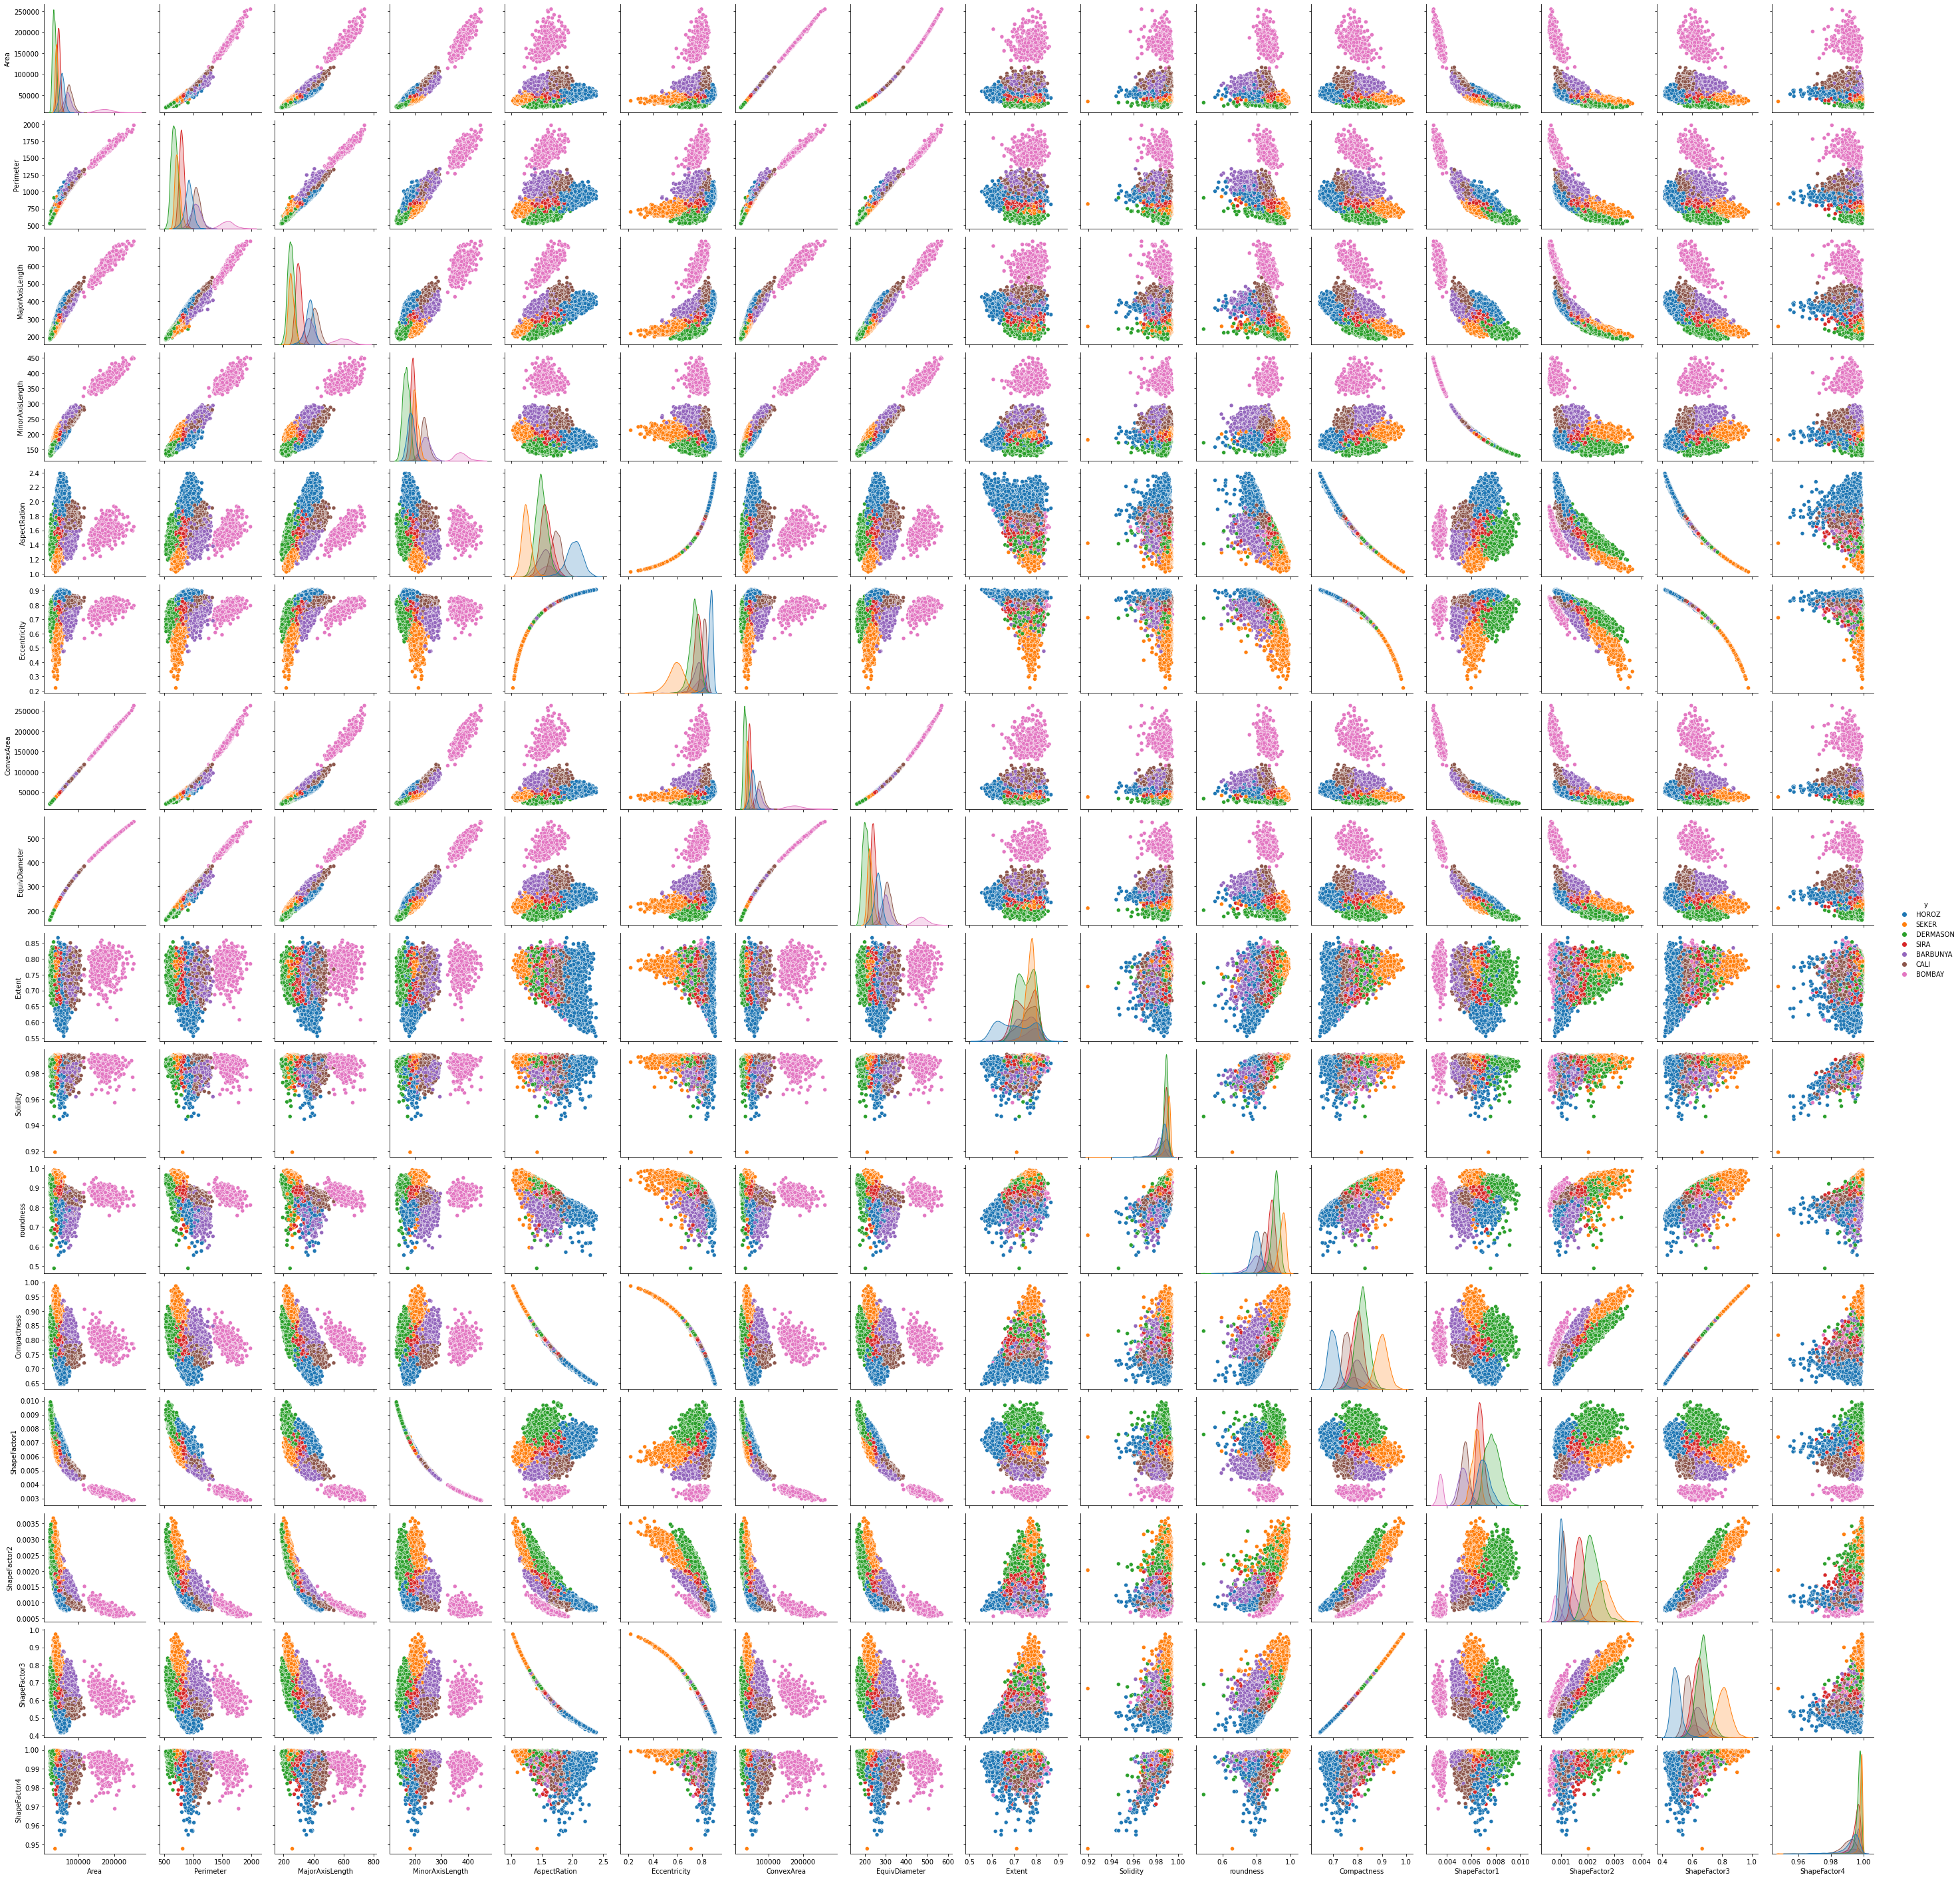

In [11]:
# Checking Outliers
sns.pairplot(train_df,hue='y')


We will Drop Some Outliers

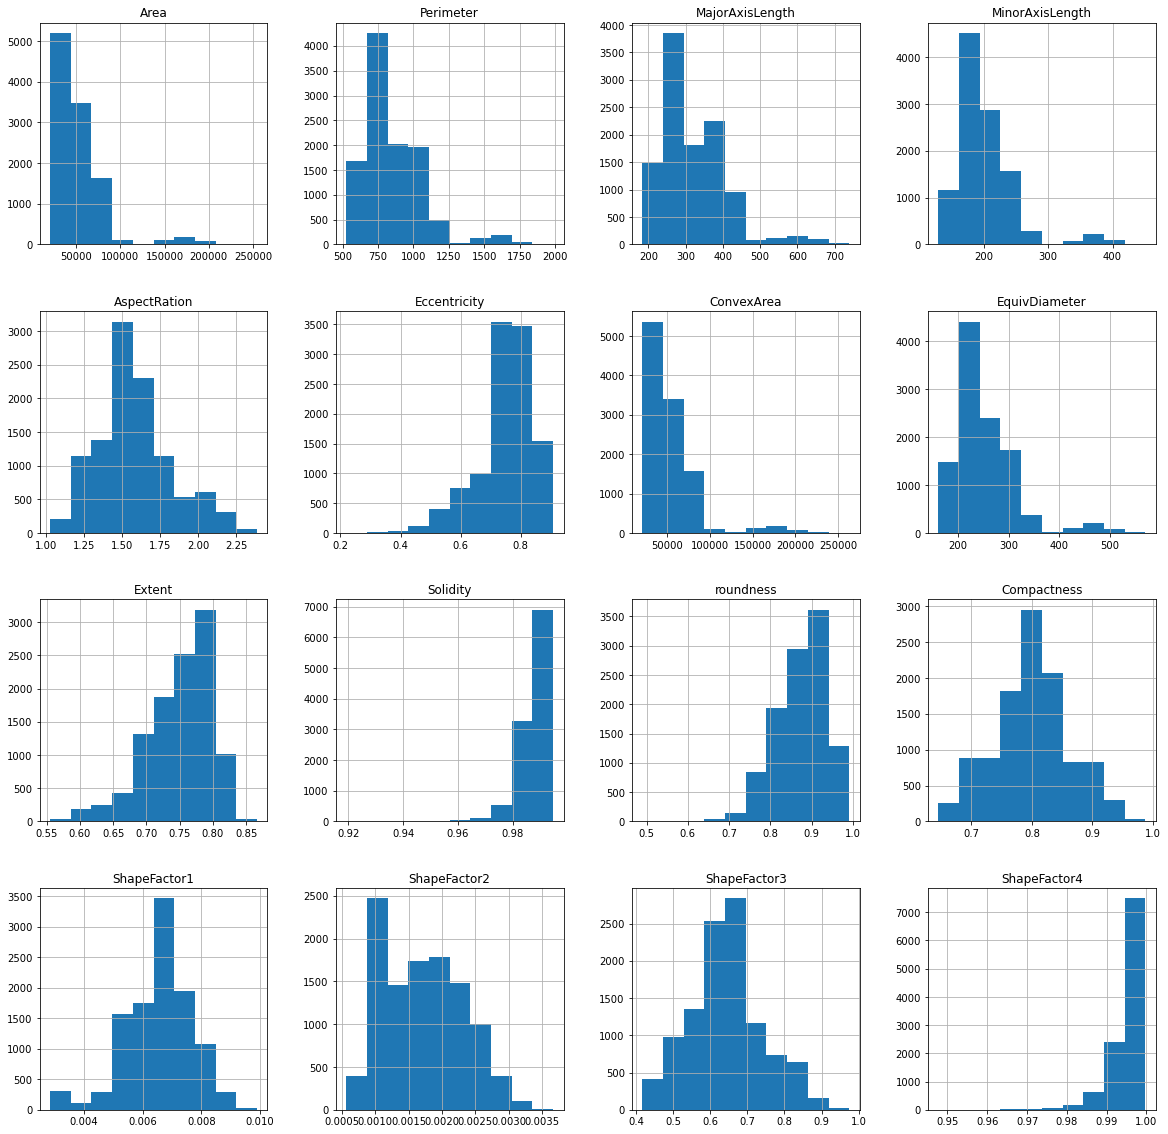

In [12]:
# Checking Distribution and Skewness
train_df.hist(figsize=(20,20));

We will Scale The Data

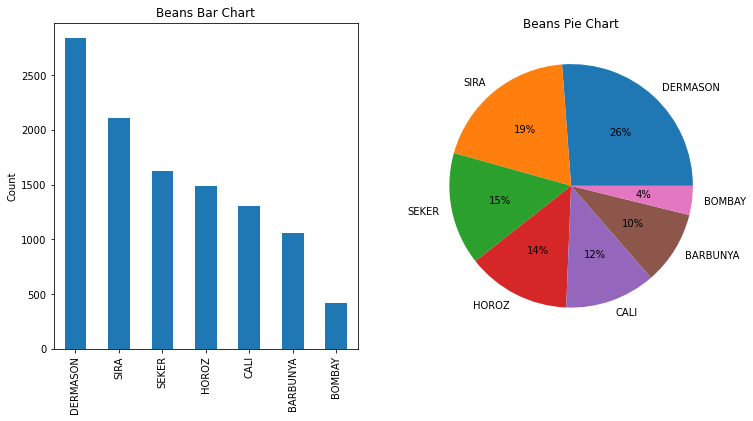

In [13]:
# Checking Balance Of Data
plt.subplot(1,2,2);
train_df['y'].value_counts().plot(kind = 'pie', figsize=(12,6), 
                                    fontsize=10, autopct='%1.0f%%');
plt.title('Beans Pie Chart');
plt.ylabel('');

###################################################################

plt.subplot(1,2,1);
train_df['y'].value_counts().plot(kind = 'bar', figsize=(12,6));
plt.title('Beans Bar Chart');
plt.ylabel('Count');

We Will OverSample The Data

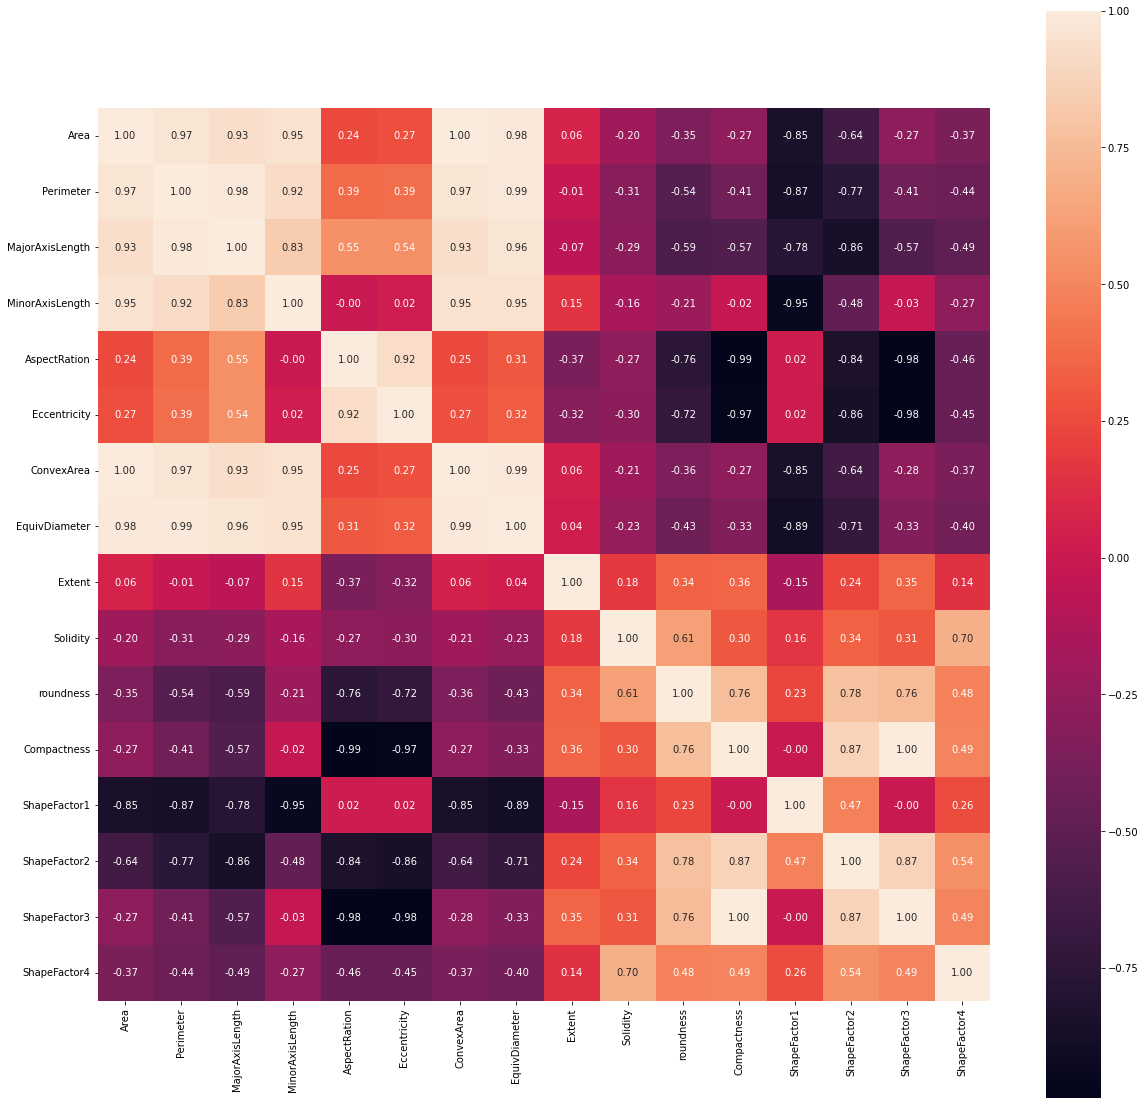

In [14]:
# Checking Correlation Of Data
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),square=True, annot=True, fmt='.2f');

# Feature Engineering

### Dropping Unnecessary Features [AspectRation, Extent]

In [15]:
train_df = train_df.drop(['AspectRation', 'Extent'], axis = 1)
test_df = test_df.drop(['AspectRation', 'Extent'], axis = 1)

### Dropping Outliers

In [16]:
def iqr_fence(data_frame, column):
    '''Function To calculates and trim upper and lower bound
       For a Given Column in a Data_Frame'''
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (2 * IQR)
    Upper_Fence = Q3 + (2 * IQR)
    u = max(data_frame[column][data_frame[column]<Upper_Fence])
    l = min(data_frame[column][data_frame[column]>Lower_Fence])
    data_frame = data_frame[data_frame[column] > l]
    data_frame = data_frame[data_frame[column] < u]
    
    return data_frame

In [17]:
labels = list(train_df['y'].value_counts().index)
columns = list(train_df.columns)

In [18]:
def remove_outliers(dataframe, target):
    '''Iterate Over Each Feature and Drop Outliers'''
    
    data_frames = []
    
    labels = list(dataframe[target].value_counts().index)
    columns = list(dataframe.drop(target, axis=1).columns)
    
    for label in labels:
    
        data_frame = dataframe[dataframe[target]==label]
        
        for column in columns:

            data_frame = iqr_fence(data_frame, column)
        
        data_frames.append(data_frame)
        
    return data_frames

In [19]:
# Remove Outliers
data_frames = remove_outliers(train_df, 'y')

Data is Grouped as Function Works With each Target Separatly<br>
We Will Shuffle The Data Twice

In [20]:
no_outlier_train_data = pd.concat([data for data in data_frames])
no_outlier_train_data = no_outlier_train_data.sample(no_outlier_train_data.shape[0], replace = False)
no_outlier_train_data = no_outlier_train_data.sample(no_outlier_train_data.shape[0], replace = False)

In [21]:
no_outlier_train_data.shape , train_df.shape

((9885, 15), (10834, 15))

## Train Test Split

In [22]:
X = no_outlier_train_data.drop('y',axis = 1)
y = no_outlier_train_data['y']

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y,
                                               train_size=0.8,
                                               stratify = y,
                                               random_state=100)

# PCA
From Correlation Matrix, We Will Decompose Highly Correlated Feature Into One Feature

In [24]:
from sklearn.decomposition import PCA

pca = PCA(1)

features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
            'ConvexArea', 'EquivDiameter']


new_xtrain_features = pd.DataFrame(pca.fit_transform(X_train[features]),
                                   columns=['PC1'], index=X_train.index)

new_xtest_features  = pd.DataFrame(pca.transform(X_test[features]),
                                   columns=['PC1'], index=X_test.index)

new_testdf_features = pd.DataFrame(pca.transform(test_df[features]),
                                   columns=['PC1'], index=test_df.index)

print('Variance Of Decomposed Feature: ',pca.explained_variance_ratio_)

Variance Of Decomposed Feature:  [0.99997787]


In [25]:
# Append The PC to Data

final_x_train = pd.concat((X_train.drop(features, axis=1), new_xtrain_features), axis=1)
final_x_test = pd.concat((X_test.drop(features, axis=1), new_xtest_features), axis=1)
final_test_df = pd.concat((test_df.drop(features, axis=1), new_testdf_features), axis=1)

# Standard Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

Standard_Scaler_X = StandardScaler()
#Robust_Scaler_X = RobustScaler()
#MinMax_Scaler_X = MinMaxScaler()



scaled_X_train = Standard_Scaler_X.fit_transform(final_x_train)
#scaled_X_train = Robust_Scaler_X.fit_transform(final_x_train)
#scaled_X_train = MinMaxScaler.fit_transform(final_x_train)


scaled_X_test = Standard_Scaler_X.transform(final_x_test)
#scaled_X_test = Robust_Scaler_X.transform(final_x_test)
#scaled_X_test = MinMaxScaler.transform(final_x_test)

scaeld_test_df = Standard_Scaler_X.transform(final_test_df)
#scaeld_test_df = Robust_Scaler_X.transform(final_test_df)
#scaeld_test_df = MinMaxScaler.transform(final_test_df)

# Balncing Data

In [27]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(scaled_X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'DERMASON': 2103, 'SIRA': 1570, 'SEKER': 1150, 'HOROZ': 1028, 'CALI': 990, 'BARBUNYA': 773, 'BOMBAY': 294})
After Counter({'SEKER': 2103, 'DERMASON': 2103, 'SIRA': 2103, 'HOROZ': 2103, 'CALI': 2103, 'BARBUNYA': 2103, 'BOMBAY': 2103})


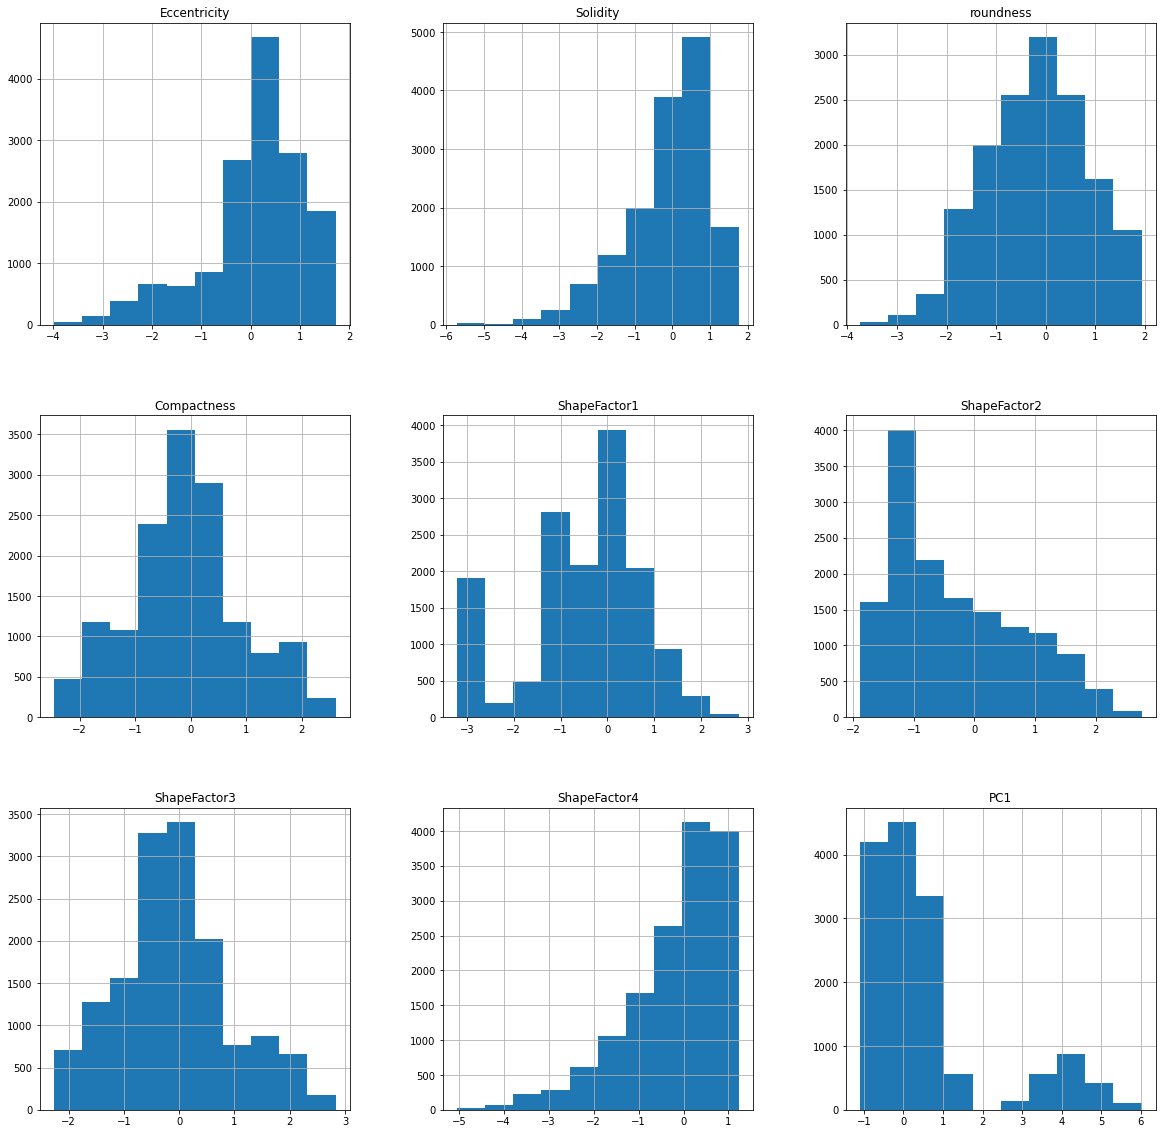

In [28]:
# Checking Distribution

pd.DataFrame(X_train_sm, columns=final_x_train.columns).hist(figsize=(20,20));

In [29]:
# Final Data Frame To Work with
balanced_df = pd.DataFrame(np.concatenate((X_train_sm, np.array(y_train_sm).reshape(-1,1)),
                                     axis = 1),
                           columns=list(final_x_train.columns) + ['y'])

balanced_df.head(3)

Eccentricity  Solidity roundness Compactness ShapeFactor1 ShapeFactor2  \
0     -1.31538  0.794282  1.140475    1.303315    -0.076326     1.132816   
1    -0.036779  0.337251  0.592752    0.202716     1.061173     0.617838   
2     0.576543      0.17  0.081995   -0.493165     0.555795       -0.267   

  ShapeFactor3 ShapeFactor4       PC1         y  
0     1.327527     1.022491 -0.471546     SEKER  
1     0.166316    -0.212338 -0.715745  DERMASON  
2    -0.520855      0.00874 -0.390253      SIRA

# Label Encoding The Target

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_sm = encoder.fit_transform(y_train_sm)
y_test = encoder.transform(y_test)

# Model Selection

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


rf_model = RandomForestClassifier(n_estimators=50,
                                 min_samples_split=4,
                                 max_depth=10,)
rf_model.fit(X_train_sm, y_train_sm)
print('Training Acuurace', rf_model.score(X_train_sm, y_train_sm))
print()

print('Testing Acuurace', rf_model.score(scaled_X_test, y_test))


Training Acuurace 0.9747299775830446

Testing Acuurace 0.9428426909458776


In [32]:
pd.DataFrame(encoder.inverse_transform(rf_model.predict(scaeld_test_df))).value_counts()

DERMASON    694
SIRA        564
SEKER       391
HOROZ       366
CALI        331
BARBUNYA    258
BOMBAY      105
dtype: int64

### Trying With 5-Fold Cross Validation

In [33]:
full_X_train = np.append(X_train_sm, scaled_X_test, axis=0)
full_y_train = np.append(y_train_sm, y_test, axis=0)

In [34]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(5)

for train_index, test_index in skf.split(full_X_train, full_y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    kX_train, kX_test = full_X_train[train_index], full_X_train[test_index]
    ky_train, ky_test = full_y_train[train_index], full_y_train[test_index]
    
    rf_model.fit(kX_train, ky_train)
    print('Training Acuurace', rf_model.score(kX_train, ky_train))
    print('Testing Acuurace', rf_model.score(kX_test, ky_test))
    print()

Training Acuurace 0.9732744422817787
Testing Acuurace 0.9547904191616766

Training Acuurace 0.9729749962569247
Testing Acuurace 0.9616766467065868

Training Acuurace 0.9721515196885762
Testing Acuurace 0.9607784431137725

Training Acuurace 0.9731267310427427
Testing Acuurace 0.9634621144055107

Training Acuurace 0.9726775956284153
Testing Acuurace 0.9589697514225816



In [35]:
rf_model.fit(full_X_train, full_y_train)
print('Training Acuurace', rf_model.score(full_X_train, full_y_train))

Training Acuurace 0.9723919032219428


In [36]:
pd.DataFrame(encoder.inverse_transform(rf_model.predict(scaeld_test_df))).value_counts()

DERMASON    694
SIRA        560
SEKER       397
HOROZ       360
CALI        334
BARBUNYA    259
BOMBAY      105
dtype: int64

## LGBM Classifier 1

In [37]:
from lightgbm import LGBMClassifier

lgb_one = LGBMClassifier(max_depth=7, n_estimators=50,
                     num_leaves=10)

lgb_one.fit(X_train_sm, y_train_sm)
print('Training Acuurace', lgb_one.score(X_train_sm, y_train_sm))
print()

print('Testing Acuurace', lgb_one.score(scaled_X_test, y_test))

Training Acuurace 0.9783982066435704

Testing Acuurace 0.9463834092058675


### Trying With 5-Fold Cross Validation

In [38]:
skf = StratifiedKFold(5)

for train_index, test_index in skf.split(full_X_train, full_y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    kX_train, kX_test = full_X_train[train_index], full_X_train[test_index]
    ky_train, ky_test = full_y_train[train_index], full_y_train[test_index]
    
    lgb_one.fit(kX_train, ky_train)
    print('Training Acuurace', lgb_one.score(kX_train, ky_train))
    print('Testing Acuurace', lgb_one.score(kX_test, ky_test))
    print()

Training Acuurace 0.9771672406048809
Testing Acuurace 0.9556886227544911

Training Acuurace 0.9765683485551729
Testing Acuurace 0.9610778443113772

Training Acuurace 0.9763437640365324
Testing Acuurace 0.962874251497006

Training Acuurace 0.97679467025975
Testing Acuurace 0.9655585504642108

Training Acuurace 0.9776929410884048
Testing Acuurace 0.9637616052710393



In [39]:
lgb_one.fit(full_X_train, full_y_train)
print('Training Acuurace', lgb_one.score(full_X_train, full_y_train))

Training Acuurace 0.9753862738052461


## LGBM Classifier 2

In [40]:
lgb_two = LGBMClassifier(learning_rate=0.3, max_depth=15,
                         n_estimators=10, reg_lambda=0.3,
                         num_leaves = 30)

lgb_two.fit(X_train_sm, y_train_sm)
print('Training Acuurace', lgb_two.score(X_train_sm, y_train_sm))
print()

print('Testing Acuurace', lgb_two.score(scaled_X_test, y_test))

Training Acuurace 0.9883160111405476

Testing Acuurace 0.9428426909458776


### Trying With 5-Fold Cross Validation

In [41]:
skf = StratifiedKFold(5)

for train_index, test_index in skf.split(full_X_train, full_y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    kX_train, kX_test = full_X_train[train_index], full_X_train[test_index]
    ky_train, ky_test = full_y_train[train_index], full_y_train[test_index]
    
    lgb_two.fit(kX_train, ky_train)
    print('Training Acuurace', lgb_two.score(kX_train, ky_train))
    print('Testing Acuurace', lgb_two.score(kX_test, ky_test))
    print()

Training Acuurace 0.9886210510555472
Testing Acuurace 0.9556886227544911

Training Acuurace 0.9882467435244797
Testing Acuurace 0.9634730538922156

Training Acuurace 0.9877975744871987
Testing Acuurace 0.9598802395209581

Training Acuurace 0.9874242083988323
Testing Acuurace 0.9640610961365679

Training Acuurace 0.9890710382513661
Testing Acuurace 0.963162623539982



In [42]:
lgb_two.fit(full_X_train, full_y_train)
print('Training Acuurace', lgb_two.score(full_X_train, full_y_train))

Training Acuurace 0.9857467960234758


## SVC

In [43]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=1.5,probability=True)

svc.fit(X_train_sm, y_train_sm)
print('Training Acuurace', svc.score(X_train_sm, y_train_sm))
print()

print('Testing Acuurace', svc.score(scaled_X_test, y_test))

Training Acuurace 0.9609401535221792

Testing Acuurace 0.9479008598887203


### Trying With 5-Fold Cross Validation

In [44]:
skf = StratifiedKFold(5)

for train_index, test_index in skf.split(full_X_train, full_y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    kX_train, kX_test = full_X_train[train_index], full_X_train[test_index]
    ky_train, ky_test = full_y_train[train_index], full_y_train[test_index]
    
    svc.fit(kX_train, ky_train)
    print('Training Acuurace', svc.score(kX_train, ky_train))
    print('Testing Acuurace', svc.score(kX_test, ky_test))
    print()

Training Acuurace 0.9592753406198533
Testing Acuurace 0.9568862275449102

Training Acuurace 0.9596496481509208
Testing Acuurace 0.9586826347305389

Training Acuurace 0.9598742326695613
Testing Acuurace 0.9583832335329341

Training Acuurace 0.9596526686129201
Testing Acuurace 0.9589697514225816

Training Acuurace 0.9587543977842653
Testing Acuurace 0.963162623539982



In [45]:
svc.fit(full_X_train, full_y_train)
print('Training Acuurace', svc.score(full_X_train, full_y_train))

Training Acuurace 0.9594562223020721


## Multi Layer Perceptron

In [46]:
from sklearn.neural_network import MLPClassifier

ml_model = MLPClassifier(solver='adam', alpha=1e-3,hidden_layer_sizes=(4, 4, 7),
                         learning_rate_init=0.03,max_iter = 3000, random_state=1)

ml_model.fit(X_train_sm, y_train_sm)
print('Training Acuurace', ml_model.score(X_train_sm, y_train_sm))
print()

print('Testing Acuurace', ml_model.score(scaled_X_test, y_test))

Training Acuurace 0.9537395557367027

Testing Acuurace 0.9448659585230147


### Trying With 5-Fold Cross Validation

In [47]:
skf = StratifiedKFold(5)

for train_index, test_index in skf.split(full_X_train, full_y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    kX_train, kX_test = full_X_train[train_index], full_X_train[test_index]
    ky_train, ky_test = full_y_train[train_index], full_y_train[test_index]
    
    ml_model.fit(kX_train, ky_train)
    print('Training Acuurace', ml_model.score(kX_train, ky_train))
    print('Testing Acuurace', ml_model.score(kX_test, ky_test))
    print()

Training Acuurace 0.9519389130109298
Testing Acuurace 0.9464071856287425

Training Acuurace 0.9528372510854919
Testing Acuurace 0.9505988023952096

Training Acuurace 0.9511154364425812
Testing Acuurace 0.9449101796407186

Training Acuurace 0.9544127554457669
Testing Acuurace 0.9538784067085954

Training Acuurace 0.944232352721012
Testing Acuurace 0.9433962264150944



In [48]:
ml_model.fit(full_X_train, full_y_train)
print('Training Acuurace', ml_model.score(full_X_train, full_y_train))

Training Acuurace 0.9515510839621512


# Applying Voting Classifier

In [49]:
from sklearn.ensemble import VotingClassifier

models = [
    ('LGBM_ONE', lgb_one),
    ('LGBM_TWO',lgb_two),
    ('SVC',svc),
    ('RandomForest',rf_model),
    ('MultiLayerPerceptron',ml_model)
]

ensemble = VotingClassifier(estimators=models,voting = 'soft')

ensemble.fit(X_train_sm, y_train_sm)
print('Training Acuurace', ensemble.score(X_train_sm, y_train_sm))
print()

print('Testing Acuurace', ensemble.score(scaled_X_test, y_test))

Training Acuurace 0.9743903267441071

Testing Acuurace 0.9489124936772888


### Trying With 5-Fold Cross Validation

In [50]:
skf = StratifiedKFold(5)

for train_index, test_index in skf.split(full_X_train, full_y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    kX_train, kX_test = full_X_train[train_index], full_X_train[test_index]
    ky_train, ky_test = full_y_train[train_index], full_y_train[test_index]
    
    ensemble.fit(kX_train, ky_train)
    print('Training Acuurace', ensemble.score(kX_train, ky_train))
    print('Testing Acuurace', ensemble.score(kX_test, ky_test))
    print()

Training Acuurace 0.9731247192693517
Testing Acuurace 0.9577844311377246

Training Acuurace 0.9731995807755652
Testing Acuurace 0.962874251497006

Training Acuurace 0.9731247192693517
Testing Acuurace 0.9619760479041917

Training Acuurace 0.972902163335579
Testing Acuurace 0.966157532195268

Training Acuurace 0.9728273074331911
Testing Acuurace 0.9637616052710393



In [51]:
ensemble.fit(full_X_train, full_y_train)
print('Training Acuurace', ensemble.score(full_X_train, full_y_train))

Training Acuurace 0.97167325428195


In [52]:
pd.DataFrame(encoder.inverse_transform(ensemble.predict(scaeld_test_df))).value_counts()

DERMASON    715
SIRA        531
SEKER       399
HOROZ       367
CALI        330
BARBUNYA    262
BOMBAY      105
dtype: int64

In [53]:
prediction = ensemble.predict(scaeld_test_df)
prediction = encoder.inverse_transform(prediction)

In [54]:
sumbit_df = pd.DataFrame(data= {"ID": pd.DataFrame(test_df).index, 
                                "y": prediction})

sumbit_df.head(2)

ID         y
0  10834     HOROZ
1  10835  DERMASON

In [55]:
sumbit_df.to_csv('submission.csv', index=False)

In [56]:
pd.read_csv('submission.csv')

ID         y
0     10834     HOROZ
1     10835  DERMASON
2     10836  BARBUNYA
3     10837  DERMASON
4     10838    BOMBAY
...     ...       ...
2704  13538      CALI
2705  13539     SEKER
2706  13540     HOROZ
2707  13541  DERMASON
2708  13542      SIRA

[2709 rows x 2 columns]